In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [4]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [5]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Task 1: Experiment with the validation split
In the following code cell, you'll see a variable named validation_split, which we've initialized at 0.2. The validation_split variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a validation_split of 0.2 means that:

17,000 * 0.2 ~= 3,400 examples will become the validation set.
17,000 * 0.8 ~= 13,600 examples will become the new training set.
The following code builds a model, trains it on the training set, and evaluates the built model on both:

The training set.
And the validation set.
If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are not almost identical. Hmm, that's odd.

Experiment with two or three different values of validation_split. Do different values of validation_split fix the problem?

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 40468.7500 - root_mean_squared_error: 201.1685 - val_loss: 49076.6055 - val_root_mean_squared_error: 221.5324
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 23363.2109 - root_mean_squared_error: 152.8503 - val_loss: 28758.2754 - val_root_mean_squared_error: 169.5827
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 12372.3574 - root_mean_squared_error: 111.2311 - val_loss: 15603.0586 - val_root_mean_squared_error: 124.9122
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7301.4199 - root_mean_squared_error: 85.4483 - val_loss: 9549.3770 - val_root_mean_squared_error: 97.7209
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6512.8540 - root_mean_squared_error: 80.7023 - val_loss: 9369.1572 - val_root_mean_squared_error: 96.7944
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6513.0669 - ro

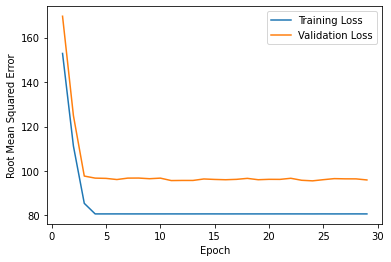

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Task 2: Determine why the loss curves differ
No matter how you split the training set and the validation set, the loss curves differ significantly. Evidently, the data in the training set isn't similar enough to the data in the validation set. Counterintuitive? Yes, but this problem is actually pretty common in machine learning.

Your task is to determine why the loss curves aren't highly similar. As with most issues in machine learning, the problem is rooted in the data itself. To solve this mystery of why the training set and validation set aren't almost identical, write a line or two of pandas code in the following code cell. Here are a couple of hints:

The previous code cell split the original training set into:
a reduced training set (the original training set - the validation set)
the validation set
By default, the pandas head method outputs the first 5 rows of the DataFrame. To see more of the training set, specify the n argument to head and assign a large positive integer to n.
[ ]


In [7]:
#@title Double-click for a possible solution to Task 2.

# Examine examples 0 through 4 and examples 25 through 29
# of the training set
train_df.head(n=1000)

# The original training set is sorted by longitude. 
# Apparently, longitude influences the relationship of
# total_rooms to median_house_value.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


Task 3. Fix the problem
To fix the problem, shuffle the examples in the training set before splitting the examples into a training set and validation set. To do so, take the following steps:

Shuffle the data in the training set by adding the following line anywhere before you call train_model (in the code cell associated with Task 1):

In [8]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

Pass shuffled_train_df (instead of train_df) as the second argument to train_model (in the code call associated with Task 1) so that the call becomes as follows:

In [10]:
#@title Double-click to view the complete implementation.

# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                      my_label, epochs, batch_size, 
                                      validation_split)

Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.8643 - root_mean_squared_error: 83.4378 - val_loss: 7228.3945 - val_root_mean_squared_error: 85.0200
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.8872 - root_mean_squared_error: 83.4379 - val_loss: 7228.6260 - val_root_mean_squared_error: 85.0213
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 6960.4834 - root_mean_squared_error: 83.4295 - val_loss: 7233.8159 - val_root_mean_squared_error: 85.0518
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.3735 - root_mean_squared_error: 83.4348 - val_loss: 7227.5459 - val_root_mean_squared_error: 85.0150
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 6962.0649 - root_mean_squared_error: 83.4390 - val_loss: 7227.5166 - val_root_mean_squared_error: 85.0148
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.7192 - root_mean_squa

136/136 [==============================] - 0s 2ms/step - loss: 6961.6890 - root_mean_squared_error: 83.4367 - val_loss: 7226.7812 - val_root_mean_squared_error: 85.0105
Epoch 47/70
136/136 [==============================] - 0s 2ms/step - loss: 6960.9575 - root_mean_squared_error: 83.4324 - val_loss: 7228.8970 - val_root_mean_squared_error: 85.0229
Epoch 48/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.4683 - root_mean_squared_error: 83.4354 - val_loss: 7229.9922 - val_root_mean_squared_error: 85.0294
Epoch 49/70
136/136 [==============================] - 0s 2ms/step - loss: 6960.6958 - root_mean_squared_error: 83.4308 - val_loss: 7228.3198 - val_root_mean_squared_error: 85.0195
Epoch 50/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.9116 - root_mean_squared_error: 83.4381 - val_loss: 7230.9146 - val_root_mean_squared_error: 85.0348
Epoch 51/70
136/136 [==============================] - 0s 2ms/step - loss: 6961.2524 - root_mean_squared_er